<a href="https://colab.research.google.com/github/Nishantarya80/CatVSDog/blob/main/CatsVSDogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

url = 'https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz'
target_path = 'images.tar.gz'
response = requests.get(url, stream=True)
if response.status_code == 200:
    with open(target_path, 'wb') as f:
        f.write(response.raw.read())
response        

<Response [200]>

In [2]:
import tarfile
  
# open file
file = tarfile.open(target_path)
  
# extracting file
file.extractall('./Data')
  
file.close()

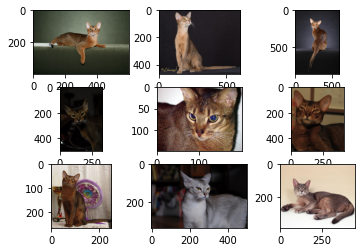

None


In [3]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'Data/images/'
# plot first few images
for i in range(1,10):
	# define subplot
  pyplot.subplot(330 + 1 + i-1)
	# define filename
  filename = folder + 'Abyssinian_' +str(i) + '.jpg'
	# load image pixels
  image = imread(filename)
	# plot raw pixel data
  pyplot.imshow(image)
# show the figure

print(pyplot.show())

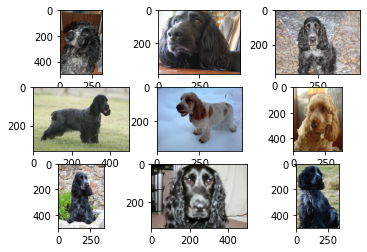

None


In [4]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'Data/images/'
# plot first few images
for i in range(1,10):
	# define subplot
  pyplot.subplot(330 + 1 + i-1)
	# define filename
  filename = folder + 'english_cocker_spaniel_' +str(i) + '.jpg'
	# load image pixels
  image = imread(filename)
	# plot raw pixel data
  pyplot.imshow(image)
# show the figure

print(pyplot.show())

In [5]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'Data/images/'
photos, labels = list(), list()
cats=['Abyssinian','Bengal','Bombay','Birman','British_Shorthair','Maine_Coon','Persian','Egyptian_Mau','Ragdoll','Russian_Blue','Siamese']
# enumerate files in the directory
try:
  for file in listdir(folder):
    # determine class
    output = 0.0
    if list(filter(file.startswith, cats)):
      output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
except:
  print("test")   
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('dogs_vs_cats_photos.npy', photos)
save('dogs_vs_cats_labels.npy', labels)

test
(154, 200, 200, 3) (154,)


In [6]:
dogs=['boxer',
'keeshond',
'havanese',
'basset_hound',
'english_setter',
'miniature_pinscher',
'chihuahua',
'great_pyrenees',
'german_shorthaired',
'beagle',
'staffordshire_bull_terrier',
'english_cocker_spaniel',
'new_found_land',
'pomeranian',
'leonberger',
'american_pit_bull_terrier',
'wheaten_terrier',
'japanese_chin',
'samyod',
'scottish_terrier',
'shiba_inu',
'pug',
'saint_bernard',
'american_bulldog',
'yorkshire_terrier']

In [7]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'Data/images'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if list(filter(file.startswith, cats)):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif list(filter(file.startswith, dogs)):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [8]:
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

Three Block VGG Model


In [ ]:
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

plot diagnostic learning curves

In [12]:
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_plot.png')
  print(pyplot.show())
  pyplot.close()


run the test harness for evaluating a model

Found 5083 images belonging to 2 classes.
Found 1707 images belonging to 2 classes.
> 75.806


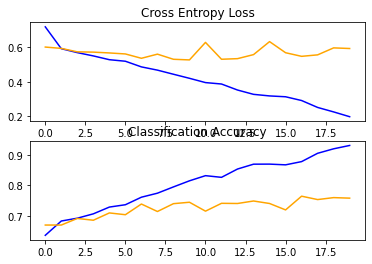

None


In [ ]:
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Image Data Augmentation

*train_datagen = ImageDataGenerator(rescale=1.0/255.0,	width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)*

In [ ]:
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = test_datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Found 5083 images belonging to 2 classes.
Found 1707 images belonging to 2 classes.


Transfer learning

In [9]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	# save model
	model.save('final_model.h5')
run_test_harness() 

Found 5065 images belonging to 2 classes.
Found 1725 images belonging to 2 classes.
Epoch 1/10
80/80 [==============================] - 2285s 29s/step - loss: 1.3826 - accuracy: 0.9388 - val_loss: 0.0639 - val_accuracy: 0.9757
Epoch 2/10
80/80 [==============================] - 2201s 28s/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0611 - val_accuracy: 0.9780
Epoch 3/10
64/80 [=======================>......] - ETA: 5:27 - loss: 0.0050 - accuracy: 0.9993

In [14]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(224, 224))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 224, 224, 3)
	# center pixel data
	img = img.astype('float32')
	img = img - [123.68, 116.779, 103.939]
	return img
 

In [16]:
def run_example():
	# load the image
	img = load_image('samplecat.jpg')
	# load model
	model = load_model('final_model.h5')
	# predict the class
	result = model.predict(img)
	print(result[0])
 
# entry point, run the example
run_example()

[0.]
